### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Mar 30th at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.

Text(0.02, 0.5, 'Labels')

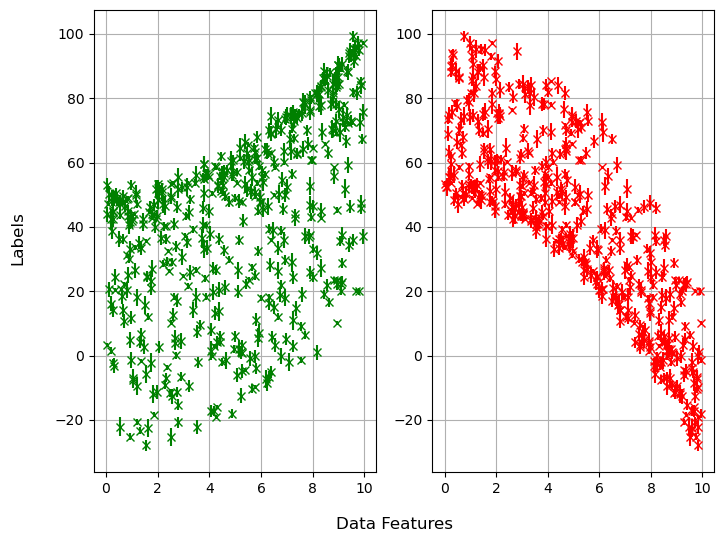

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Load data and make variables for data
file = np.load('hw_data_cp/hw7_data_1_NicholasHoward.npy')
x = file[:,:2]
y = file[:,2]
yerr = file[:,3]
del file

# Plot data in 2-panel 
fig, axs = plt.subplots(1,2,figsize=(8,6))
ax1,ax2 = axs

ax1.errorbar(x[:,0],y,yerr=yerr,fmt='x',c='green')
ax2.errorbar(x[:,1],y,yerr=yerr,fmt='x',c='red')
ax1.grid()
ax2.grid()
fig.supxlabel('Data Features')
fig.supylabel('Labels')

2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?

In [2]:
from astroML.linear_model import LinearRegression

# Linear regression fit 
model1 = LinearRegression(fit_intercept=True)
model1.fit(X=x,y=y,y_error=yerr)

print('Best-fit intercept parameters:\n intercept: %f\n slopes: (%f, %f)' % 
      (model1.coef_[0], model1.coef_[1], model1.coef_[2]))

Fits = model1.coef_ # Make array with intercept, and slopes values

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Best-fit intercept parameters:
 intercept: 57.101023
 slopes: (4.948730, -8.300234)


Text(0.02, 0.5, 'Labels')

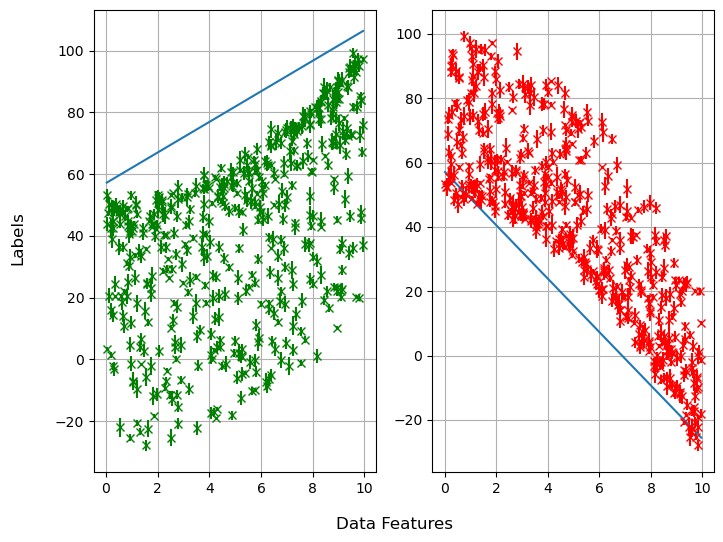

In [3]:
x_guess1 = np.linspace(x[:,0].min(),x[:,0].max(),50)
x_guess2 = np.linspace(x[:,1].min(),x[:,1].max(),50)

y1 = Fits[1] * x_guess1 + Fits[0] # Fits[1] is the coeffiecent and Fits[0] is the intercept
y2 = Fits[2] * x_guess2 + Fits[0]


# Recreate 2 panel plot with new fit
fig, axs = plt.subplots(1,2,figsize=(8,6))
ax1,ax2 = axs

ax1.errorbar(x[:,0],y,yerr=yerr,fmt='x',c='green')
ax1.plot(x_guess1,y1)

ax2.errorbar(x[:,1],y,yerr=yerr,fmt='x',c='red')
ax2.plot(x_guess2,y2)
ax1.grid()
ax2.grid()
fig.supxlabel('Data Features')
fig.supylabel('Labels')

# Not a good description of the data, may require a non linear solution... 

3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [348]:
# install the relevant interactive plot packages
# only do this once
#!pip install ipywidgets ipympl
#!pip install ipympl

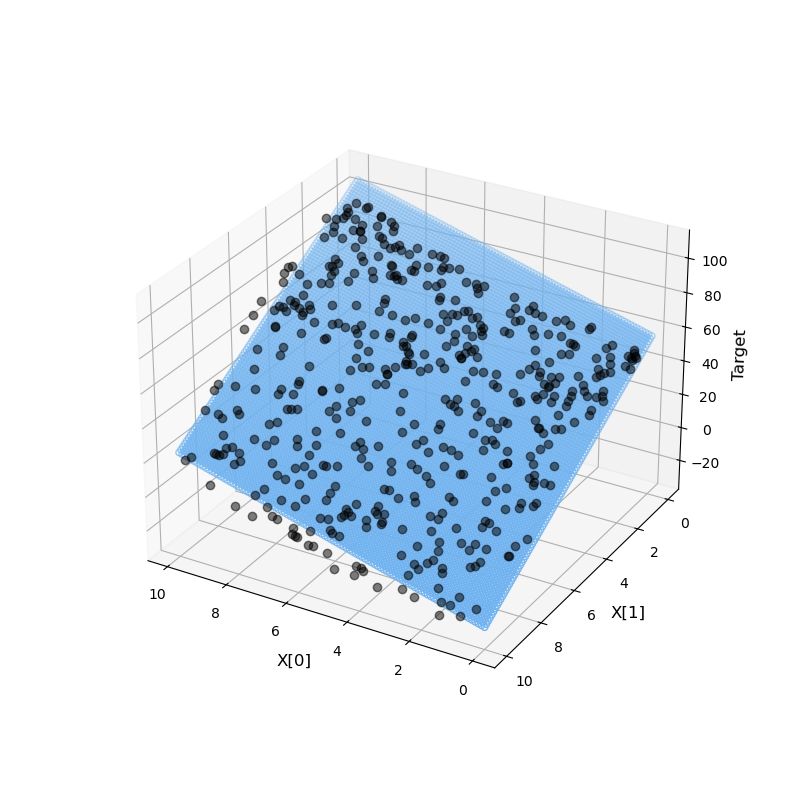

In [111]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell

#%matplotlib inline
%matplotlib widget

#Make 2d meshgrid
Xgrid = np.meshgrid(x_guess1, x_guess2)

# Predict labels from 2d meshgrid
Label = Fits[2] * Xgrid[1] + Fits[1] * Xgrid[0] + Fits[0]

#Below is your code, mate.
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.plot(x[:,0], x[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)

# Plot fit
ax.scatter(xs=Xgrid[0].flatten(), ys=Xgrid[1].flatten(), zs=Label, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [112]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline
plt.close()

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*

Best params: {'alpha': 1.0, 'solver': 'svd'} 
Best Score: 0.929080


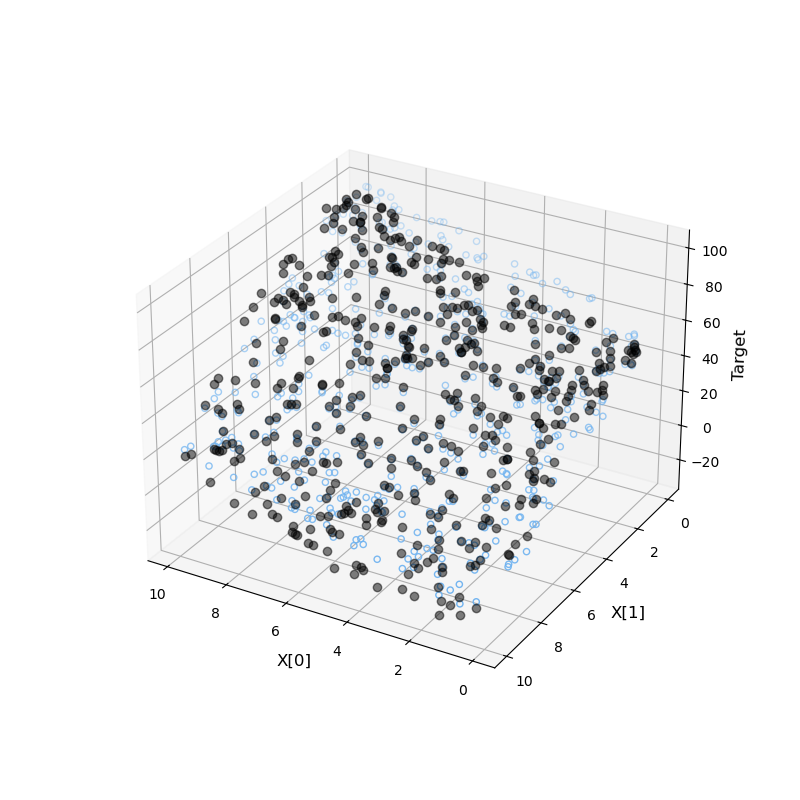

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

#Make Grid search for estimator and fit to data, also print best values from search
sk_model = GridSearchCV(Ridge(),param_grid= {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']})
f_model = sk_model.fit(x,y)
print('Best params: %s \nBest Score: %f' % (f_model.best_params_, f_model.best_score_))
r_fit = Ridge(alpha = f_model.best_params_['alpha'],
              solver=f_model.best_params_['solver'],fit_intercept=True).fit(x,y)

# Get best fit parameters and get best predicted labels
alpha, beta = r_fit.coef_
y_fit = alpha * x[:,0]+ beta * x[:,1] + r_fit.intercept_

%matplotlib widget

#Below is your code, mate.
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

#Used to be y 
# Plot data
ax.plot(x[:,0], x[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)

# Plot fit
ax.scatter(xs= x[:,0], ys= x[:,1], zs=y_fit, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

Best alpha: 1.000000


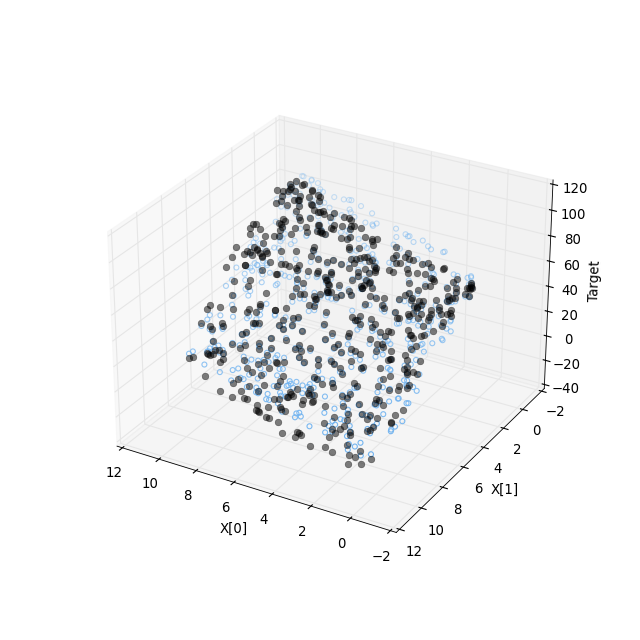

In [218]:
# Ridge cross validation, fit to data, print best alpha
sk_model = RidgeCV(alphas=[0.05,0.1,0.2,0.5,1.0])
f_model = sk_model.fit(x,y)
print('Best alpha: %f' % (f_model.alpha_))
r_fit = Ridge(alpha = f_model.alpha_,
              fit_intercept=True).fit(x,y)

# Get best fit parameters and get new label guesses
alpha, beta = r_fit.coef_
y_fit = alpha * x[:,0]+ beta * x[:,1] + r_fit.intercept_

%matplotlib widget

#Below is your code, mate.
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.plot(x[:,0], x[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)

# Plot fit
ax.scatter(xs= x[:,0], ys= x[:,1], zs=y_fit, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

The two alphas are close to one, so I would say they do agree

5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*

In [113]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

#Run GPR without any input of uncertainties
gmodel1 = GaussianProcessRegressor()
gmodel1.fit(x,y) #Fit data to model
label_pred1 = gmodel1.predict(x) #Predict label values within x range
plt.hist(label_pred1,bins=30,label='No uncertainties') #Make histogram

#Run GPR with uncertainties
gmodel2 = GaussianProcessRegressor(alpha=(yerr/y)**2)
gmodel2.fit(x,y) #Fit data to model
label_pred2 = gmodel2.predict(x) #Predict label values within x range
plt.hist(label_pred2,bins=30,label='Uncertainties',alpha=0.7) #Make histogram

plt.title('Gaussian process regression predictions')
plt.legend()
plt.grid()
plt.ylabel('Counts')
plt.xlabel('Label values');
# They look mostly the same

6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?

Best fit regression coefficients: [ 5.00363666e+01  3.26437755e-01  7.04566290e-02  3.76478281e-01
 -2.37398556e-02 -8.70986046e-01  1.19122182e-02  2.54637597e-02
 -1.32002013e-02  2.02705370e-02 -4.53796076e-04 -5.21142180e-04
 -2.06194460e-03  1.68744189e-03 -1.52054198e-03]


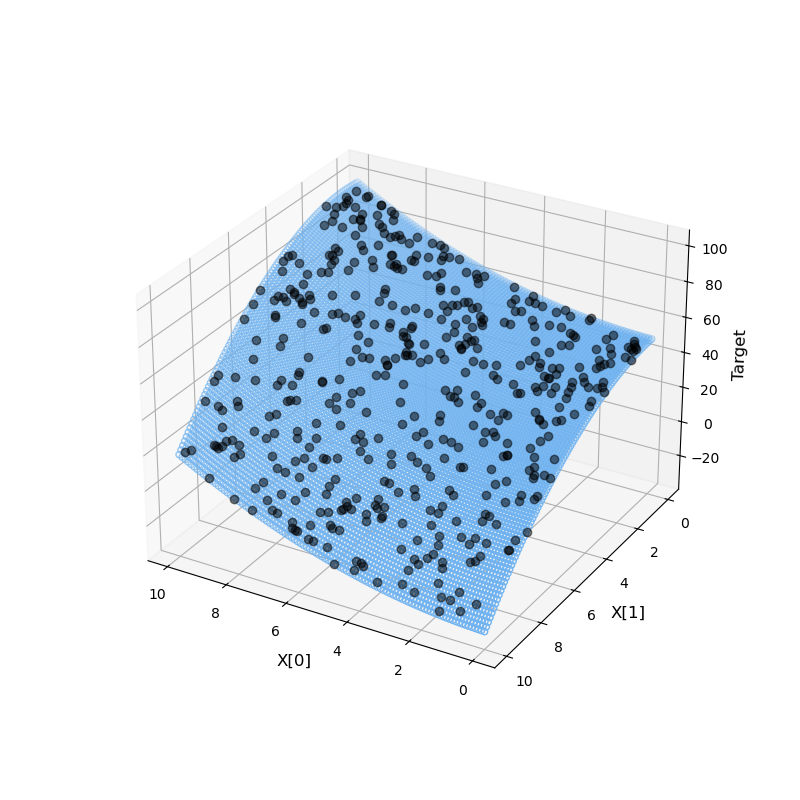

In [108]:
from astroML.linear_model import PolynomialRegression

%matplotlib widget
# Make 500 x 500 grid of possible X values
x_guess1 = np.linspace(x[:,0].min(), x[:,0].max(),100)
x_guess2 = np.linspace(x[:,1].min(), x[:,1].max(),100)
Xgrid = np.array(np.meshgrid(x_guess1, x_guess2))
Xgrid = Xgrid.reshape(2,-1).T # Make 2d grid conform to functions input

#Create Regression and fit to data
pmodel = PolynomialRegression(degree=4)
pmodel.fit(x,y)
print('Best fit regression coefficients: %s' % pmodel.coef_)

#Predict on a 2d meshgrid
ppred = pmodel.predict(Xgrid)

#Below is your code, mate.
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.plot(x[:,0], x[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)

# Plot fit
ax.scatter(xs= Xgrid[:,0], ys= Xgrid[:,1], zs=ppred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')

ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

This model is much better than the previous models, as I guessed earlier this was definetley a polynomial solution. Also
This does not look like an over-fitting problem, because the surface is between the data points!

In [109]:
plt.close()

7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

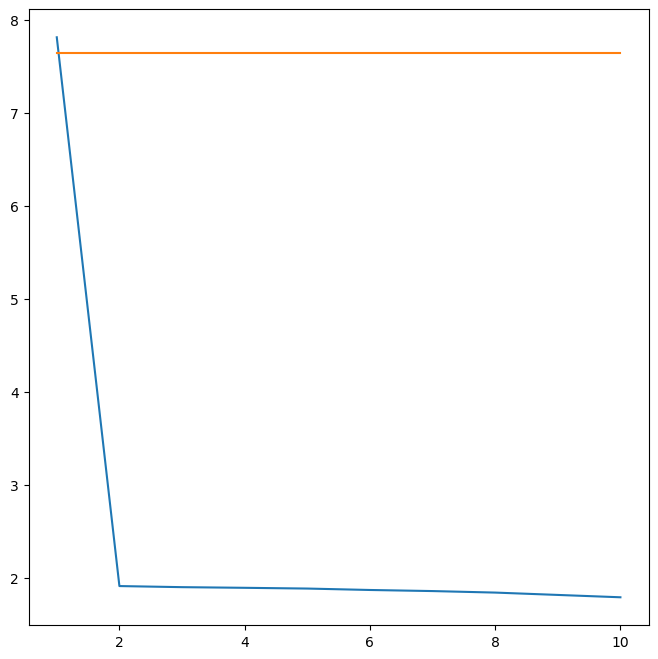

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Run Train Test Split (TTS)
x_train, x_test, y_train, y_test, yerr_train, yerr_test = train_test_split(x,y,yerr,test_size=0.2)
# Compute training

degrees = np.linspace(1,10,9,dtype=int)
training_err = np.zeros(degrees.shape[0])
crossval_err = np.zeros(degrees.shape[0])


fig = plt.figure(figsize=(8, 8))
for ind,i in enumerate(degrees):

    func_cv = PolynomialRegression(degree=i).fit(x,y)
    y_cv = func.predict(x)

    func_train = PolynomialRegression(degree=i).fit(x_train,y_train)
    yfit_train = func_train.predict(x_train)
    
    training_err[ind] = np.sqrt(np.sum((y_train - yfit_train) ** 2)
                              / len(y_train))
    crossval_err[ind] = np.sqrt(np.sum((y - y_cv) ** 2)
                              / len(y_cv))
plt.plot(degrees, training_err)
plt.plot(degrees, crossval_err)

# I can't figure this out, will have to go to office hours 

In [201]:
from sklearn.metrics import mean_squared_error
mean_squared_error(

In [215]:
crossval_err

array([7.6425051, 7.6425051, 7.6425051, 7.6425051, 7.6425051, 7.6425051,
       7.6425051, 7.6425051, 7.6425051])